# Introduction

International applicants have difficulty selecting US graduate programs that best suit their profiles. With various different crucial parameters like GRE, TOEFL score, or research, they are often under-informed or misinformed of each factor’s contribution to the admission (Acharya et al., 2019). This analysis clarifies part of this confusion, by answering whether undergraduate GPA is a good predictor for students’ chances of admission, or whether other predictors are needed. By constructing correlation and simple regression, potentially multiple regression, on the sample dataset from Acharya et al. (2019)’s paper, this report provides some insights for international students to predict their admission to US graduate schools. 

# Dataset

The dataset contains 500 observations of students, listing their GRE, TOEFL, undergraduate GPA, numeric strength for Statement of Purpose (SOP) and Letter of Recommendation (LOR), and Chance of Admission. 

**Population**: It contains various paramaters to predict the chance of admission to US graduate schools 

Name | Type | Description 
:--- | :--- | :---
GRE Score | discrete | Score for Graduate Record Examinations (GRE), the standardized test often required or recommended by US graduate schools (0-340)
TOEFL Score | discrete | Standardized test score used to measure the English ability of non-native speakers wishing to enroll in English-speaking universities (0-120)
University Rating | ordinal | Numeric values for University Ranking (0-5)
SOP | ordinal | Strength for Statement of Purpose (0-5.0)
LOR | ordinal | Strength for Letter of Recommendations (0-5.0)
CGPA | discrete | Undergraduate GPA standardized on the scale of 0-10.00
Research | nominal, dummy | either 0 (for no research) and 1 (for having research) 
Chance of Admit | discrete | (0-1.00) ranging from no chance to certainty of admission  

# 1. Import & Clean data

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("white")

data = pd.read_csv('graduate_admission.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [2]:
data.rename(columns = {"LOR ": "LOR", 
                     "University Rating ": "University Rating",
                     "Chance of Admit ": "Chance of Admit"}, 
            inplace = True)

df = data[["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit"]]
df

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65
...,...,...,...,...
495,332,108,9.02,0.87
496,337,117,9.87,0.96
497,330,120,9.56,0.93
498,312,103,8.43,0.73


### Check missing values and duplicates

In [3]:
#check every column if there are any missing values
df.isna().sum()

GRE Score          0
TOEFL Score        0
CGPA               0
Chance of Admit    0
dtype: int64

In [4]:
#check duplicates on every row in the dataset
df.duplicated().sum()

0

**Conclusion**: There are no missing values nor duplicates in the dataset.

# 2. Summary Statistics & Data Visualizations

The report chooses the Chance of Admission as the response variable and GPA as the predictor, which produces the highest correlation of $r = 0.8824$ with the response variable

In [5]:
def get_highest_correlation(data, response):
    '''
    Checks correlation of each predictor with respons variable
    and return the predictor with the higest correlation & its r
    '''
    y_data = data[response]
    x_data = data.drop(columns = response)
    
    corr_lst = [x_data[predictor].corr(y_data) for predictor in x_data.columns]
    
    max_corr = max(corr_lst)
    predictor = df.columns[corr_lst.index(max_corr)]
    return predictor, round(max_corr, 4)

get_highest_correlation(df, "Chance of Admit")

('CGPA', 0.8824)

## 2.1. Define predictor & response variables

In [6]:
predictor1 = "CGPA"
response = "Chance of Admit"

## 2.2. Descriptive Statistics 

In [7]:
round(df.describe(), 2)

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.00,500.00,500.00,500.00
mean,316.47,107.19,8.58,0.72
std,11.30,6.08,0.60,0.14
min,290.00,92.00,6.80,0.34
25%,308.00,103.00,8.13,0.63
50%,317.00,107.00,8.56,0.72
75%,325.00,112.00,9.04,0.82
max,340.00,120.00,9.92,0.97


## 2.3. Scatterplot

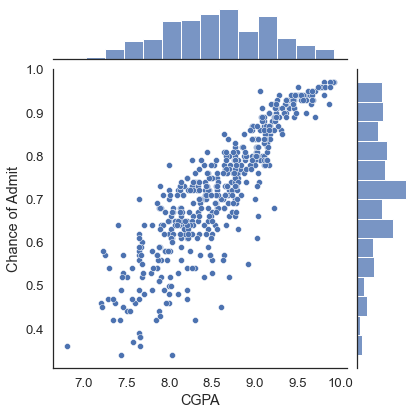

In [8]:
#draw jointplot scatterplot to illustrate the bivariate relationship 
#draw histogram for both the predictor & the response

sns.jointplot(data = df, x = predictor1, y = response)
plt.show()

This figure exhibits a linear relationship as data gather around an imaginary upward line, with only few outliers diverging from it. Although the scatters are more heteroscedastic than homoscedastic, they look relatively “football-shaped,” which will help meet subsequent conditions for linear regression.   

# 3. LINER Conditions for Multiple Regression

## 3.1. Linearity between predictor and response variables

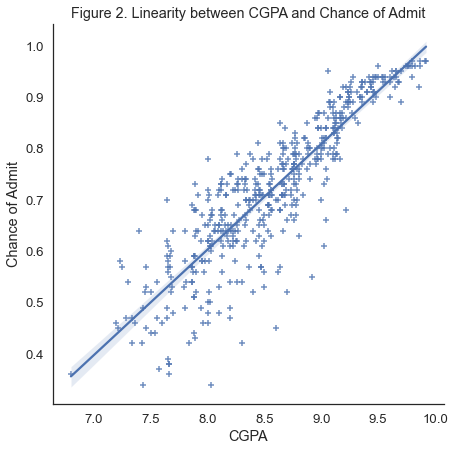

In [9]:
plt.figure(figsize=(7,7))
regplot = sns.regplot(data = df, x = predictor1, y = response, marker="+", fit_reg=True)
regplot.set_title(f"Figure 2. Linearity between {predictor1} and {response}")
sns.despine()

## 3.2. Independent observations

The yearly number of international applicants should outnumber 300,000 current international graduate students in the US (Duffin, 2021). Because the dataset was sampled without replacement (Acharya et. al, 2019), this report assumes that its 500 observations occupy less than 0.17% of the population, meeting the independence requirement. 

## 3.3. Normality of residuals

The following QQ plot shows that the distribution of residuals is approximately normal. However, the divergence of some low-value residuals from the line representing normality may weaken this assumption. 

In [10]:
def construct_ols_model(data, predictors, response):
    x = data[predictors]
    y = data[response]
    
    #add constant to predictor 
    x = sm.add_constant(x)

    #fit linear regression model
    reg_model = sm.OLS(y, x).fit() 
    
    return reg_model

simple_reg_model = construct_ols_model(df, predictor1, response)

/Users/chiffonng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/Users/chiffonng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


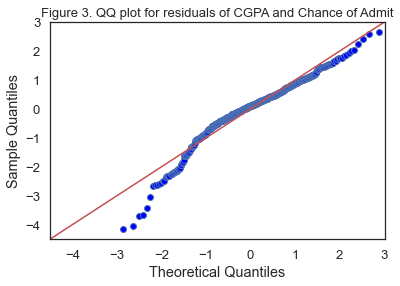

In [23]:
qqplot = sm.qqplot(simple_reg_model.resid, 
                   fit = True, 
                   line='45')
plt.title(f"Figure 3. QQ plot for residuals of {predictor1} and {response}", size = 13)
plt.show()

## 3.4. Equal variance of residuals: Residual plot

This condition requires nearly equal scatter of residuals above and below zero within any vertical slices, or homoscedasticity. Figure 4 shows more positive residuals than negative residuals, a few of which further distance themselves from the line, skewing the constant variability. However, because scatters are relatively homoscedastic, this report assumes this condition is met. 

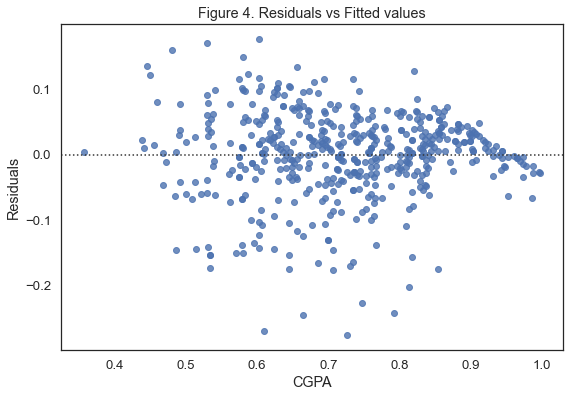

In [12]:
plt.figure(figsize=(9,6))
residual_plot = sns.residplot(x = simple_reg_model.predict(), y = simple_reg_model.resid)
residual_plot.set(xlabel = f"{predictor1}", ylabel = "Residuals")
residual_plot.set_title('Figure 4. Residuals vs Fitted values')
plt.show()

## 3.5. Randomness

This dataset is a simple random sample. 

## 3.6. Summary on LINER Conditions

All LINER assumptions for simple linear regression between the predictor GPA and the response Chance of Admission are reasonably met. Still, there is a chance the sample includes mostly extreme outliers from the population of international students applying to US graduate schools. 

# 4. Simple Regression
## 4.1. Pearson's correlation coefficient $r$

$$r = \frac{1}{n-1}\sum{\left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)} = \frac{1}{n-1}\sum{z_{x_i}z_{y_i}}$$

In [13]:
def cal_correlation_coef(data, predictor_name, response_name):
    '''
    Calculate Pearson's correlation coefficient r
    
    Arguments:
    ----------
    data: DataFrame
    
    predictor_name: str
        Column name of the predictor variable
    response_name: str
        Column name of the response variable
    
    Result:
    ----------
    r: float
        Pearson's correlation coefficient
'''
    r = data[predictor_name].corr(data[response_name])
    return r

r = round(cal_correlation_coef(df, predictor1, response), 4)

print(f"The Pearson's r between {predictor1} and {response} is {r}")

The Pearson's r between CGPA and Chance of Admit is 0.8824


$r= 0.8824$ implies a strong, positive correlation between GPA and Chance of Admission: 

- $r>0$ indicates a positive correlation between GPA and Chance of Admission; 
- $r$ is closer to 1 than to 0, implying their data likely clusters closely around an upward straight line

However, we have to note that
- the correlation coefficient, is not a good summary for non-linear association, heteroscedasticity or outliers
- the implication for r was made thanks to the football-shaped scatter plot proved in previous sections
- cannot differentiate between dependent and independent variables
- correlation does not imply causation; although GPA is shown to be highly correlated with Chance of Admission, high GPA does not guarantee better admission chance into a US university.

## 4.2. Simple regression equation

In [14]:
simple_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1752.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          3.40e-165
Time:                        21:07:45   Log-Likelihood:                 647.04
No. Observations:                 500   AIC:                            -1290.
Df Residuals:                     498   BIC:                            -1282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0443      0.042    -24.689      0.000      -1.127      -0.961
CGPA           0.2059      0.005     41.855      0.000       0.196       0.216
==============================================================================
Omnibus:                       77.451   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.520
Skew:                          -0.898   Prob(JB):                     6.84e-32
Kurtosis:                       4.915   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model summary reads the regression equation as:

$$\hat{\text{admission}}= -1.0443 + 0.2059 \times \text{GPA}$$

The slope of 0.2059 reveals the steepness of the regression line. For every point increase in GPA, the model predicts the Chance of Admission to increase by 0.2059, or 20.59%. The intercept of -1.0443 equates to the response’s value when the predictor’s value is 0. However, it is impossible because the value for Chance of Admission only ranges from 0 to 1.

## 4.3. Coefficient of Determination: R-squared & adjusted R-squared

Compared to correlation coefficient $r$, $R^2$ are more useful in assessing the effect of the dependent variable(s) on the independent variable. It measures the proportion of variance in the response﻿ can be explained by the regression on the predictor. In other words, it﻿ measures how much variability in residuals eliminated by the linear least-squares regression model, using this formula:

$$R^2 = 1 - \frac{\text{SSE}}{\text{SSTO}} = 1- \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

In [15]:
rsquared_dict = {"R-squared": round(simple_reg_model.rsquared, 4),
                "Adjusted R-squared": round(simple_reg_model.rsquared_adj, 4)}
rsquared_dict

{'R-squared': 0.7787, 'Adjusted R-squared': 0.7782}

This means undergraduate GPA can explain 77.87% of the variance in Chance of Admission. Since $R^2$ is particularly close to 1, the upper limit, international students’ undergraduate GPA is a good predictor of chance of admission to US graduate schools.

# 5. Multiple Regression 

## 5.1. Linearity between potential predictors and response variable

To qualify for multiple regression, each potential predictor should at least be quantitative and linearly correlated with the response. This requirement is fulfilled as seen from the pair plot below. 

The data in every scatterplot is relatively “football-shaped”, fulfilling the criteria of linear association, constant variability, and minimal outliers.

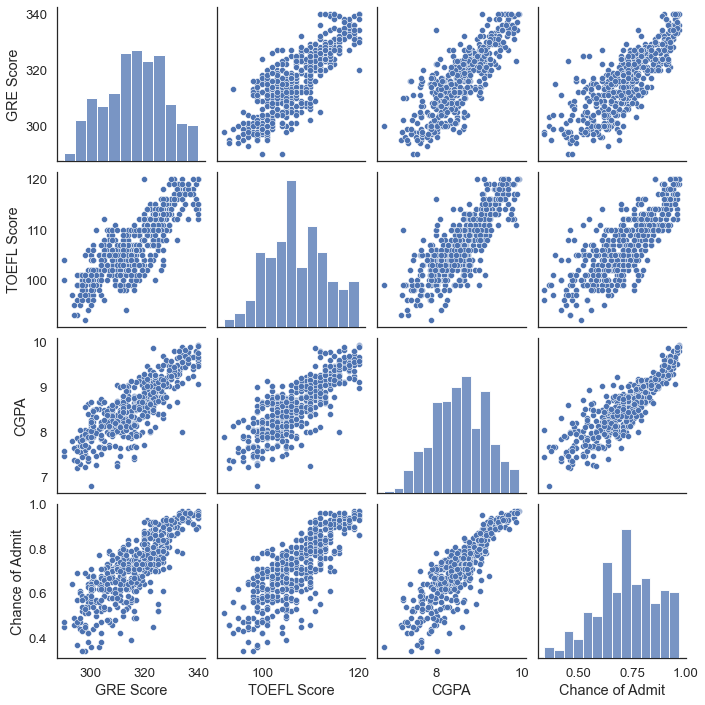

In [16]:
potential_predictors = df.columns[:-1]
sns.pairplot(data=df)
plt.show()

## 5.2. Multi-collinearity between potential predictors

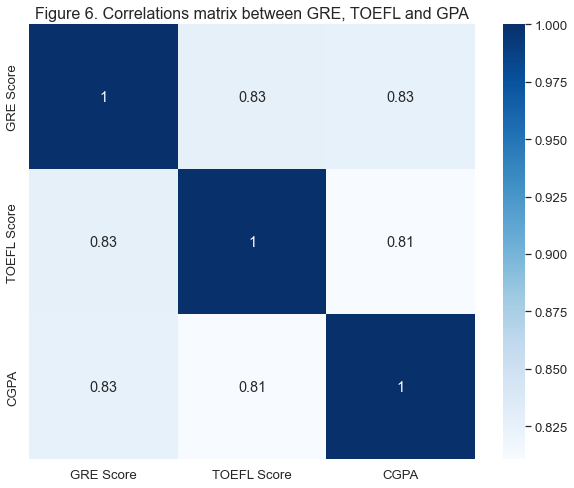

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns = response).corr(), annot = True, cmap="Blues")
plt.title("Figure 6. Correlations matrix between GRE, TOEFL and GPA", size=16)
plt.show()

Figure 6 shows notably high correlations between GPA and two potential predictors, GRE Score and TOEFL Score. We should be careful about adding them into multiple regression model.

## 5.3. Forward Selection

Using forward selection strategy, the report adds potential predictors to the simple regression and recalculates the adjusted R-squared for different combinations of predictors

In [18]:
def cal_adj_rsquared(data, x_label, y_label):
    reg_model = construct_ols_model(data, x_label, y_label)
    return reg_model.rsquared_adj

def multireg_forward_selection(data, current_predictors, response):
    '''
    This function takes the list of current predictors,
    add each of potential predictors to the multiple regression model,
    and return the adjusted R-squared for each combination
    '''
    
    #get the list of potential predictors 
    label_lst = list(data.columns)
    label_lst.remove(response)
    for x in current_predictors:
        label_lst.remove(x)
    
    #calculate adjusted R-squared and add them to a list
    adj_rsquared_lst = []
    for predictor in label_lst:
        current_predictors.append(predictor)
        adj_rsquared = cal_adj_rsquared(data, current_predictors, response)
        adj_rsquared_lst.append(round(adj_rsquared, 4))
        
        current_predictors = current_predictors[:-1]
        
    table = pd.DataFrame(zip(label_lst, adj_rsquared_lst), 
                        columns = ["Added predictor", "Adjusted R-squared"]).set_index("Added predictor")
        
    return table

multireg_forward_selection(df, [predictor1], response)

/Users/chiffonng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Adjusted R-squared
Added predictor,
GRE Score,0.7988
TOEFL Score,0.7951


The result reveals insignificant improvements in adjusted R-squared across new models. Although the combination of GPA and GRE Score produces the highest model fit, $R^2_{\text{adj}} = 0.7988$ only improves little from $R^2_{\text{adj}} = 0.7782$ of the original model. Furthermore, GPA and GRE Score are highly correlated ($r=0.83$), as seen in the pairplot above. 

**Therefore, the analysis would rather go with simple regression.**

# 6. Hypothesis Testing 

Does the linear relationship between GPA and Chance of Admission also exist in the population of all international students applying to US graduate schools? Using t-distribution validated by LINE conditions, this analysis will investigate the question by conducting a two-tailed hypothesis test on the slope of simple regression:

- H0: There is NO linear relationship between GPA and Chance of Admission in the population
- H1: There IS a linear relationship between GPA and Chance of Admission in the population

In [19]:
def cal_slope_estimate(sx, sy, r):
    b1 = r * (sy/sx)
    return b1

def cal_se_slope(sx, sy, rsquared, n):
    SE = sy / sx * ((1-rsquared) / (n - 2)) ** 0.5
    return SE
    
def simplereg_slope_inputs(data, x_label, y_label):
    x = data[x_label]
    y = data[y_label]
    n = len(data)
    
    #calculate SAMPLE standard deviation for x and y
    sx = stats.tstd(x)
    sy = stats.tstd(y)
    
    #get the correlation coefficient r
    r = cal_correlation_coef(data, x_label, y_label)
    
    #get adjusted R-squared
    adj_rsquared = cal_adj_rsquared(data, x_label, y_label)
    
    #get the simple regression slope
    b1 = cal_slope_estimate(sx, sy, r)
    
    #get the standard error of the simple regression slope 
    SE = cal_se_slope(sx, sy, adj_rsquared, n)
    df = n - 2
    
    return b1, SE, df

def simple_reg_test(data, x_label, y_label):
    b1, SE, df = simplereg_slope_inputs(data, x_label, y_label)
    
    tscore = b1 / SE
    pvalue = 2 * stats.t.sf(abs(tscore), df)
    
    result_dict = {"SE": round(SE, 4),
                   "t-score": round(tscore, 4), 
                  "p-value": pvalue}
    
    return result_dict

test_dict = simple_reg_test(df, predictor1, response)
test_dict

/Users/chiffonng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


{'SE': 0.0049, 't-score': 41.8132, 'p-value': 5.011969611306265e-165}

The two-tailed p-value of  $5\times 10^{-165}$ represents the probability of observing such an extreme (or more extreme) slope in the population if the null hypothesis is true.

Since there are no severe consequences for making a Type I or II error, the significance level is set to default $\alpha=0.05$.

Because $p=5\times 10^{-165}<\alpha$, **there is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis**: 

> There **is** a linear relationship between GPA and Chance of Admission in the population of international applicants to US graduate schools.  

In [20]:
alpha = 0.05 

def assess_stat_significance(significance_level, pvalue):
    if pvalue < significance_level:
        return "reject null hypothesis"
    else:
        return "fail to reject null hypothesis"

assess_stat_significance(alpha, test_dict['p-value'])

'reject null hypothesis'

# 7. Confidence Interval

To align with the significance level of 0.05, we set the confidence level to 95%, which means that if confidence intervals of slope were constructed for an infinite number of samples, 95% of those intervals would contain the actual population slope. 

In [21]:
confidence_lv = 0.95

def simplereg_slope_ci(data, x_label, y_label, confidence_lv): 
    b1, SE, df = simplereg_slope_inputs(data, x_label, y_label)
    
    #calculate t-score from the confidence level and degree of freedom
    percentile = 1 - (1 - confidence_lv)/ 2 #area under the curve excludes the right tail
    tscore = stats.t.ppf(percentile, df)
    
    #get the margin of error 
    margin_of_error = tscore * SE
    
    low_bound = round(b1 - margin_of_error, 4)
    high_bound = round(b1 + margin_of_error, 4)
    
    return low_bound, high_bound

confidence_interval = simplereg_slope_ci(df, predictor1, response, confidence_lv)
confidence_interval

(0.1962, 0.2156)

In [22]:
null_value = 0
def assess_ci(confidence_interval, null_value):
    
    low_bound, high_bound = confidence_interval[0], confidence_interval[-1]
    if null_value > low_bound and null_value < high_bound:
        return "fail to reject null hypothesis" 
    else:
        return "reject null hypothesis"
    
assess_ci(confidence_interval, null_value)    

'reject null hypothesis'

This confidence interval agrees with the significance test’s result.  

# Conclusion

The reports found a strong positive correlation of 0.88 between GPA and Chance of Admission in the sample. Significance test and confidence interval shows that **there's evidence for a linear relationship between them in the population of international applicants to US graduate schools.**

In the simple regression model, GPA manages to explain 77% of the variance in Chance of Admission for international applicants to US graduate schools. The rest could be attributed to other variables listed in the dataset or extraneous variables, potentially non-academic, such as financial ability. They should be analyzed under a different research question.  